# Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import dataset

In [2]:
dataset = pd.read_csv(r'C:\Users\Mahira\Desktop\daboot\python\Ders 3\real_estate_price_size.csv')
dataset

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
...,...,...
95,252460.400,549.80
96,310522.592,1037.44
97,383635.568,1504.75
98,225145.248,648.29


In [3]:
X1 = dataset['size'].values #independent variable
Y = dataset['price'].values # dependent variable

# Decision Tree Regression

## Splitting the dataset into the Training set and Test set 

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size = 0.3, random_state=42)

# Decision Tree Regressor

In [5]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

DecisionTreeRegressor()

In [26]:
y_pred_dt = regressor.predict(X_test.reshape(-1,1))

# I am NOT sure it is good practice or not, it does make sense or not
# but I wanted to check the accuracy of the train dataset in order to detect overfitting 
y_pred_train = regressor.predict(X_train.reshape(-1,1))
err = abs(y_pred_train - y_train)
print('Mean absolute error: ', round(np.mean(err), 2))
# Calculate mean absolute percentage error (MAPE)
mape_train = 100 * (err / y_train)
# Calculate and display accuracy
accuracy_train = 100 - np.mean(mape_train)
print('Accuracy:', round(accuracy_train, 2), '%.')

Mean absolute error:  19170.31
Accuracy: 92.82 %.


In [21]:
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred_dt.reshape(-1)})
pd.set_option('precision', 2)
df

,Real Values,Predicted Values
0,282683.54,181587.58
1,269523.06,274922.86
2,276875.63,328881.88
3,300061.48,243646.72
4,293044.50,338078.17
5,245747.20,243646.72
6,412569.47,359674.44
7,180307.22,244334.75
8,279555.10,338078.17
9,234314.14,181587.58


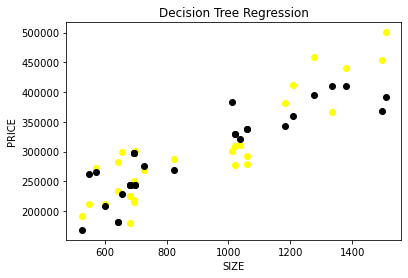

In [9]:
# Visualising the Decision Tree Regression Results 
X_grid = np.arange(min(X1), max(X1), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'yellow')
plt.scatter(X_test, y_pred_dt, color = 'black')
plt.title('Decision Tree Regression')
plt.xlabel('SIZE')
plt.ylabel('PRICE')
plt.show()

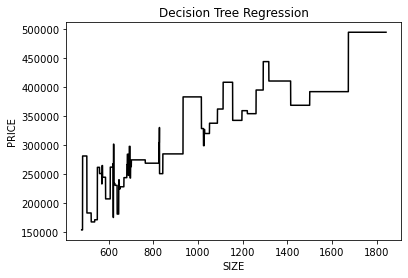

In [10]:
plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('Decision Tree Regression')
plt.xlabel('SIZE')
plt.ylabel('PRICE')
plt.show()

In [12]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
errors = abs(y_pred_dt - y_test)
print('Mean absolute error: ', round(np.mean(errors), 2))
# MSE
err_ms = mean_squared_error(y_test, y_pred_dt)
print('Mean squared error:', err_ms)
# RMS
error_rms = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print('Root mean squared error:', error_rms)

Mean absolute error:  46382.21
Mean squared error: 3013145447.559894
Root mean squared error: 54892.1255514841


In [13]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 83.88 %.


# Random Forest  Regression

In [39]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 42)
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

<ipython-input-39-7a961019a09a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))


RandomForestRegressor(n_estimators=10, random_state=42)

In [40]:
y_pred = regressor.predict(X_test.reshape(-1,1))

In [41]:
df = pd.DataFrame({'Actual Price': y_test.reshape(-1), 'Predicted Price':y_pred.reshape(-1)})
pd.set_option('precision', 2)
df

,Actual Price,Predicted Price
0,282683.54,208426.83
1,269523.06,265998.90
2,276875.63,317160.02
3,300061.48,246004.69
4,293044.50,334139.69
5,245747.20,246004.69
6,412569.47,359894.01
7,180307.22,240681.40
8,279555.10,334139.69
9,234314.14,208426.83


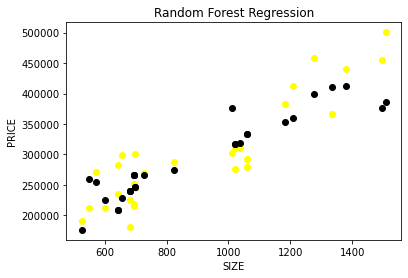

In [42]:
## Visualising the Random Forest Regression Results  
X_grid = np.arange(min(X1), max(X1), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'yellow')
plt.scatter(X_test, y_pred, color = 'black')
plt.title('Random Forest Regression')
plt.xlabel('SIZE')
plt.ylabel('PRICE')
plt.show()

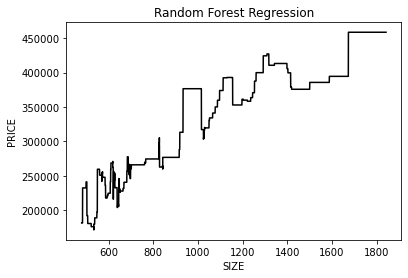

In [43]:
plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('Random Forest Regression')
plt.xlabel('SIZE')
plt.ylabel('PRICE')
plt.show()

In [44]:
errors = abs(y_pred - y_test)
print('Mean absolute error: ', round(np.mean(errors), 2))
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean absolute error:  39082.93
Accuracy: 86.79 %.


# Summary

I tried to predict <i>price</i> value for the Properties using only 1 feature (<i>size</i> independent variable). Just single feature can cause to obtain low accuracy and larger errors. As we know, in the case we have a small training error but very large validation error, it means that it could be overfitting when using decision tree. It turns out that the training accuracy is almost 93% and the decision boundary is weird looking, but test accuracy is about 83%. Moving to Random Forest Regression model, I got more accurate result (86.79%), but stil not perfect. As mentioned before, I used only 1 feature to predict.